In [1]:
import sqlite3 as sql, pandas as pd, numpy as np, matplotlib as mpl, matplotlib.pyplot as pyplot, math
from matplotlib.ticker import FormatStrFormatter

In [2]:
movieDB = 'movie.db'
conn = sql.connect(movieDB)

#Queries movie.db for movie title, release date, popularity, vote average, vote count, revenue, and budget
sql_query = ''' \
    SELECT movies.title, movies.release_date, movies.popularity, movies.vote_average, movies.vote_count, movies.revenue, movies.budget
    FROM movies
'''

moviesDF = pd.read_sql(sql_query, conn)
moviesDF


,title,release_date,popularity,vote_average,vote_count,revenue,budget
0,Bad Boys for Life,2020-01-17,73.253,7.2,6645,426505244,90000000
1,Super Troopers 2,2018-04-20,12.451,5.8,322,18850674,13500000
2,Pet Sematary,2019-04-05,24.863,5.7,2559,112399944,21000000
3,How to Train Your Dragon: The Hidden World,2019-02-22,61.609,7.8,4810,517526875,129000000
4,Star Wars: The Rise of Skywalker,2019-12-20,62.079,6.5,7223,1074144248,250000000
...,...,...,...,...,...,...,...
1925,Black Island,2021-08-18,89.923,6.2,111,0,0
1926,Jurassic Hunt,2021-08-24,293.261,5.0,155,0,0
1927,Schumacher,2021-09-15,28.985,7.4,187,0,0
1928,Hypnotic,2021-10-27,349.019,6.2,248,0,0


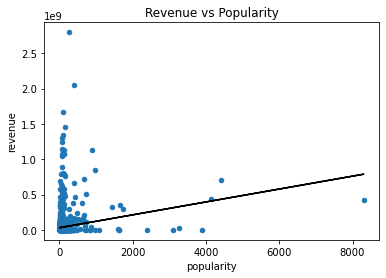

In [3]:
#Plot popularity against revenue
ax1 = moviesDF.plot.scatter(x='popularity', y='revenue')
ax1.set_title("Revenue vs Popularity")

#Linear regression on popularity and revenue
popularityCol = moviesDF.loc[:, 'popularity']
revenueCol = moviesDF.loc[:, 'revenue']

m, b = np.polyfit(popularityCol, revenueCol, deg=1)

#Plot regression line
ax1.plot(popularityCol, m*popularityCol + b, color="black")

In [4]:
#Reads covid19 worldwide cases csv file and drops the first column which contains nan values
covidDF = pd.read_csv("time_series_covid19_recovered_global.csv").iloc[:,1:]
covidDF.head

#Linear regression on revenue and covid

<bound method NDFrame.head of          Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  \
0           Afghanistan  33.939110   67.709953        0        0        0   
1               Albania  41.153300   20.168300        0        0        0   
2               Algeria  28.033900    1.659600        0        0        0   
3               Andorra  42.506300    1.521800        0        0        0   
4                Angola -11.202700   17.873900        0        0        0   
..                  ...        ...         ...      ...      ...      ...   
260             Vietnam  14.058324  108.277199        0        0        0   
261  West Bank and Gaza  31.952200   35.233200        0        0        0   
262               Yemen  15.552727   48.516388        0        0        0   
263              Zambia -13.133897   27.849332        0        0        0   
264            Zimbabwe -19.015438   29.154857        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  ... 